# Content Based Movie Recommender System

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
movies = pd.read_csv('dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('dataset/tmdb_5000_credits.csv')

In [3]:
movies.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500

## Step 1: Exploratory Data Analys of dataset 

In [4]:
movies.shape

(4803, 20)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
credits.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [7]:
credits.shape

(4803, 4)

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
# we donot need 2 separate dataset so we will merge the dataset into one 
movies = movies.merge(credits,on='title')

In [10]:
# seeing final structure of merged movies dataset 
movies.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  ... runtime  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   162.0   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   169.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title vote_average vote_count movie_id  \
0                                    Avatar          7.2      11800    19995   
1  Pirates of the Caribbean: At World's End          6.9       4500      285   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  

[2 rows x 23 columns]

In [11]:
movies.shape

(4809, 23)

In [12]:
# checking movies dataset based on original language
movies['original_language'].value_counts()

en    4510
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      12
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
he       3
th       3
ar       2
id       2
ta       2
cs       2
ro       2
sl       1
ky       1
is       1
el       1
hu       1
ps       1
te       1
vi       1
no       1
tr       1
af       1
xx       1
nb       1
pl       1
Name: original_language, dtype: int64

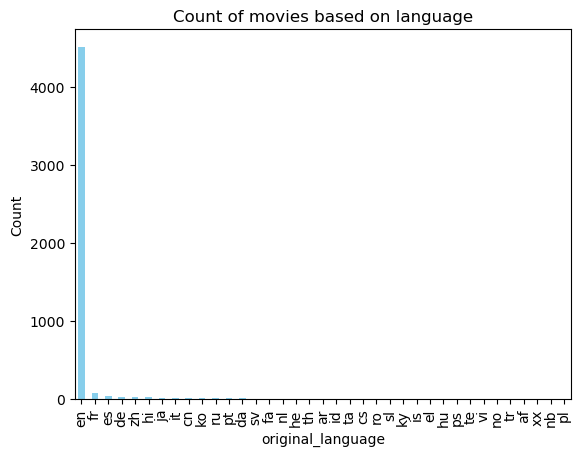

In [13]:
# Count the occurrences of each unique value in the 'Category' column
value_counts = movies['original_language'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('original_language')
plt.ylabel('Count')
plt.title('Count of movies based on language')

# Show the plot
plt.show()

#### Remark for Original Language feature
As we can see  by far dataset is so skewed that it has majority of english movies rest all langauge movies are not way close to it.
My recommendation is to drop original language feature

In [14]:
# show the budget of Top 20 movies sorted based on budget, vote_count and vote_average
movies.sort_values(["budget",'vote_count','vote_average'],ascending=False).head(20)[['budget','original_title','vote_count','vote_average']]


budget                               original_title  vote_count  \
17  380000000  Pirates of the Caribbean: On Stranger Tides        4948   
1   300000000     Pirates of the Caribbean: At World's End        4500   
7   280000000                      Avengers: Age of Ultron        6767   
10  270000000                             Superman Returns        1400   
6   260000000                                      Tangled        3330   
4   260000000                                  John Carter        2124   
5   258000000                                 Spider-Man 3        3576   
13  255000000                              The Lone Ranger        2311   
3   250000000                        The Dark Knight Rises        9106   
98  250000000            The Hobbit: An Unexpected Journey        8297   
26  250000000                   Captain America: Civil War        7241   
9   250000000           Batman v Superman: Dawn of Justice        7004   
46  250000000                   X-Men: Days of Future Past        6032   
8   250000000       Harry Potter and the Half-Blood Prince        5293   
19  250000000    The Hobbit: The Battle of the Five Armies        4760   
22  250000000          The Hobbit: The Desolation of Smaug        4524   
2   245000000                                      Spectre        4466   
0   237000000                                       Avatar       11800   
14  225000000                                 Man of Steel        6359   
18  225000000                               Men in Black 3        4160   

    vote_average  
17           6.4  
1            6.9  
7            7.3  
10           5.4  
6            7.4  
4            6.1  
5            5.9  
13           5.9  
3            7.6  
98           7.0  
26           7.1  
9            5.7  
46           7.5  
8            7.4  
19           7.1  
22           7.6  
2            6.3  
0            7.2  
14           6.5  
18           6.2

In [15]:
# show the budget of Top 20 movies sorted on the based of vote_count and vote_average to see if budge has any
# role in deciding the popularity of the movie

movies.sort_values(["vote_count",'vote_average'],ascending=False).head(20)[['budget','original_title','vote_count','vote_average']]

budget                                     original_title  \
96    160000000                                          Inception   
65    185000000                                    The Dark Knight   
0     237000000                                             Avatar   
16    220000000                                       The Avengers   
788    58000000                                           Deadpool   
95    165000000                                       Interstellar   
287   100000000                                   Django Unchained   
94    170000000                            Guardians of the Galaxy   
426    75000000                                   The Hunger Games   
127   150000000                                 Mad Max: Fury Road   
662    63000000                                         Fight Club   
3     250000000                              The Dark Knight Rises   
634    63000000                                         The Matrix   
31    200000000                                         Iron Man 3   
68    140000000                                           Iron Man   
262    93000000  The Lord of the Rings: The Fellowship of the Ring   
28    150000000                                     Jurassic World   
3237    8000000                                       Pulp Fiction   
98    250000000                  The Hobbit: An Unexpected Journey   
1887   25000000                           The Shawshank Redemption   

      vote_count  vote_average  
96         13752           8.1  
65         12002           8.2  
0          11800           7.2  
16         11776           7.4  
788        10995           7.4  
95         10867           8.1  
287        10099           7.8  
94          9742           7.9  
426         9455           6.9  
127         9427           7.2  
662         9413           8.3  
3           9106           7.6  
634         8907           7.9  
31          8806           6.8  
68          8776           7.4  
262         8705           8.0  
28          8662           6.5  
3237        8428           8.3  
98          8297           7.0  
1887        8205           8.5

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12468 (\N{KATAKANA LETTER GO}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current f

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 20491 (\N{CJK UNIFIED IDEOGRAPH-500B}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 27494 (\N{CJK UNIFIED IDEOGRAPH-6B66}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 12454 (\N{KAT

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from curre

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  plt.tight_layout()
C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3143513249.py:13: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing 

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25237 (\N{CJK UNIFIED IDEOGRAPH-6295}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29376 (\N{CJK UNIFIED IDEOGRAPH-72C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  fig.c

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21050 (\N{CJK UNIFIED IDEOGRAPH-523A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32886 (\N{CJK UNIFIED IDEOGRAPH-8076}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38577 (\N{CJK UNIFIED IDEOGRAPH-96B1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23064 (\N{CJK UNIFIED IDEOGRAPH-5A18}) missing from current font.
  fig.c

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2368 (\N{DEVANAGARI VOWEL SIGN II}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:

C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52828 (\N{HANGUL SYLLABLE CIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ravi0dubey\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50472 (\N{HANGUL SYLLABLE SSI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

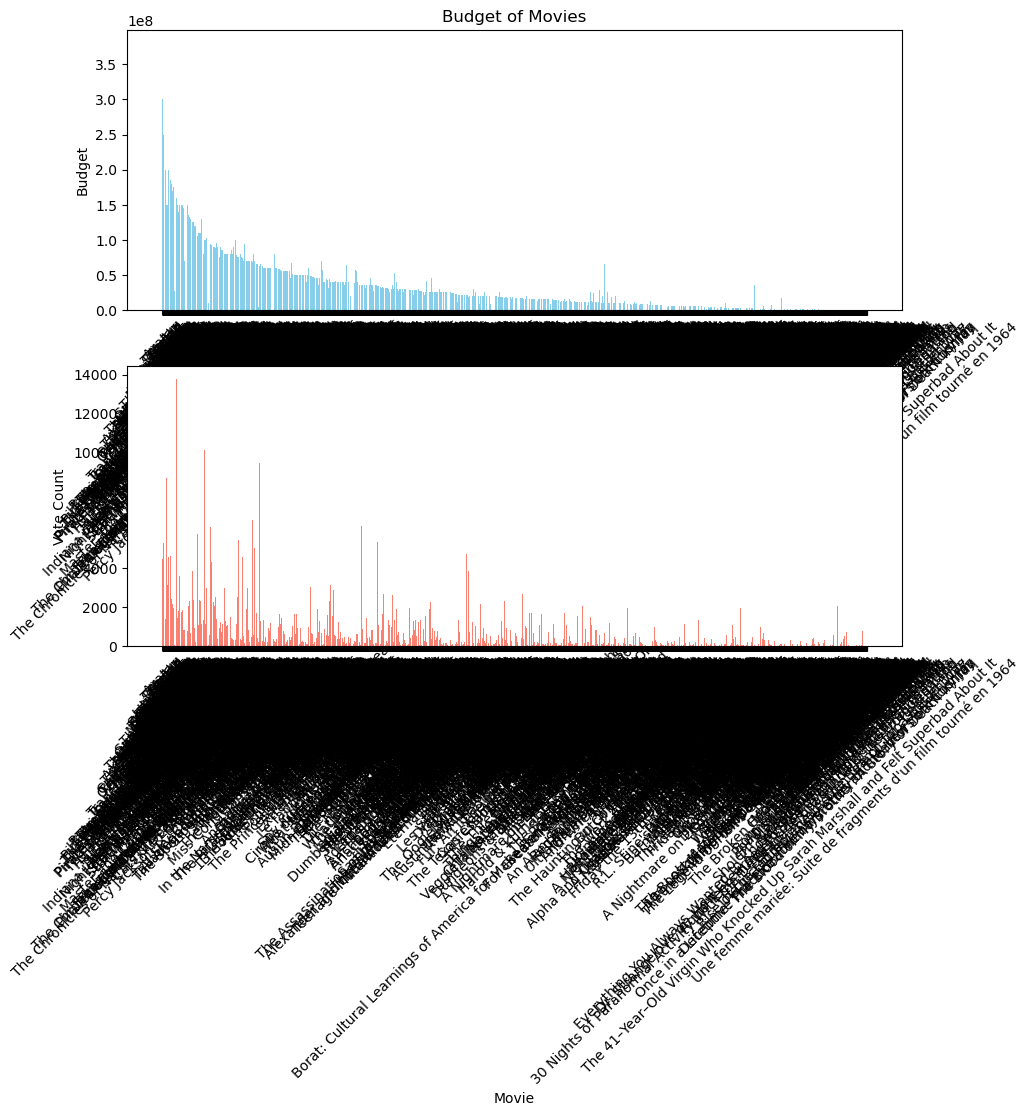

In [16]:
# Histograms for 'budget' and 'vote_count' with movie titles
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(movies['original_title'], movies['budget'], color='skyblue')
axs[0].set_title('Budget of Movies')
axs[0].set_xlabel('Original_title')
axs[0].set_ylabel('Budget')
axs[0].tick_params(axis='x', rotation=45)
axs[1].bar(movies['original_title'], movies['vote_count'], color='salmon')
axs[1].set_title('Vote Count of Movies')
axs[1].set_xlabel('Movie')
axs[1].set_ylabel('Vote Count')
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

#### As we can see budget is not a deciding factor based on the popularity of the movie.  I will not prefer to watch movies based on the budget.  
#### Recommended to drop the budget feature

In [17]:
# checking all columns of columns
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [18]:
# Keeping important columns for recommendation 
# we feel only below fields makes sense in the dataset.
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [19]:
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [20]:
movies.shape

(4809, 7)

In [21]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.6+ KB


#### movie_id is the only integer features, rest all are object types

In [22]:
# checking null values in the movie dataset
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

#### there are 3 null values in overview feature

In [23]:
# dropping null values
movies.dropna(inplace=True)

In [24]:
# verifying the null values again
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

No Null Values present in the dataset

In [25]:
# verifying the final shapes of the movies table
movies.shape

(4806, 7)

In [26]:
# checking for the duplicates
movies.duplicated().sum()

0

#### No duplicate records in the dataset

In [27]:
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

## Step 2: Feature Engineering

#### Since genres, keywords, cast and crew features has information stored in form of dictionary it needs to be extracted for use

### Step 2.1 : Handling genres feature

In [28]:
# printing first genres field to show how it is stored in the dataset

movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

#### As we can see genres is stored in form of dictionary with key as "id" and "name, we need to pick values assigned to key value name 

In [29]:
# creating a convert function which will convert dictionary text values into string 
# and fetch the value assigned to key "name" and store it in list form

import ast #for converting str to list

def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L

In [30]:
# apply convert function for genres field
movies['genres'] = movies['genres'].apply(convert)

In [31]:
movies.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

#### Genres column has got converted to List pair 

### Step 2.2 : Handling keywords feature

In [32]:
# printing keywords feature to show it is stored corrently in the dataset

movies.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [33]:
# calling convert function to convert keywords into list

movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

### Step 2.3 : Handling cast feature

In [34]:
# printing cast column
movies.iloc[0]['cast']

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

#### For Cast feature 

We can see we have many values in the cast feature but its not important to store all cast names. 
We know for any movies important actors name are shown first in the list. 
So we will keep only top 3 cast name and ignore rest.

Character is the name of the cast in the movie while name is the actual name of the actor. Hence we will extract name value from the list





In [35]:
# Here i am just keeping top 3 cast

def convert_cast(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L

In [36]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                               cast  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]   
3      [Christian Bale, Michael Caine, Gary Oldman]   
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

### Step 2.4 : Handling crew feature

In [37]:
# handle crew feature

movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [38]:
# from crew feature we are only fetching director column as director plays an important role in movies recommendation system
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
            break
    return L

In [39]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [40]:
movies.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                               cast                 crew  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      [James Cameron]  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     [Gore Verbinski]  
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]         [Sam Mendes]  
3      [Christian Bale, Michael Caine, Gary Oldman]  [Christopher Nolan]  
4    [Taylor Kitsch, Lynn Collins, Samantha Morton]     [Andrew Stanton]

### Step 2.5 : Handling Overview feature



#### We will split overview column into separate words which will be used further for embeddings

In [41]:
# handle overview (converting to list)

movies.iloc[0]['overview']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [42]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())


In [43]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [44]:
movies.head(4)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   

                                               cast                 crew  
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]      [James Cameron]  
1     [Johnny Depp, Orlando Bloom, Keira Knightley]     [Gore Verbinski]  
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]         [Sam Mendes]  
3      [Christian Bale, Michael Caine, Gary Oldman]  [Christopher Nolan]

### Step 2.6 : Removing spaces from features value

#### For Count Vectorizer we need to remove spaces from the values 

Let say we have two actors in two different movies. Sam Worthington in Avatar and Sam Mendes in Spectre.
If we donot remove space in the name field Recommendation system will treat actor name as same.

i.e name Sam Worthington will be treated as two separate values whereas it is one single name and it might recommend a different movie which has Sam Mendes in it instead of Sam Worthington based on value "Sam".

So we need to have SamWorthington insted of Sam Worthington.

In [45]:
# Creating a remove_space feature which will remove spaces if any in the feature

# eg 'Sam Worthington' will become 'Sam Worthington' after space removal

def remove_space(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [46]:

movies['cast'] = movies['cast'].apply(remove_space)
movies['crew'] = movies['crew'].apply(remove_space)
movies['genres'] = movies['genres'].apply(remove_space)
movies['keywords'] = movies['keywords'].apply(remove_space)

In [47]:
movies.head(4)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Adventure, Fantasy, Action]   
2                    [Action, Adventure, Crime]   
3              [Action, Crime, Drama, Thriller]   

                                            keywords  \
0  [cultureclash, future, spacewar, spacecolony, ...   
1  [ocean, drugabuse, exoticisland, eastindiatrad...   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...   
3  [dccomics, crimefighter, terrorist, secretiden...   

                                            cast                crew  
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]      [JamesCameron]  
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]     [GoreVerbinski]  
2      [DanielCraig, ChristophWaltz, LéaSeydoux]         [SamMendes]  
3      [ChristianBale, MichaelCaine, GaryOldman]  [ChristopherNolan]

### Step 2.7 : Creating single column for a feature

#### After data cleanup we need to create vectorize format of feature for which we will concatenate all features values into single feature call tags

In [48]:
# Concatenating all features into a tags columns
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [49]:
movies.head(4)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   

                                            overview  \
0  [In, the, 22nd, century,, a, paraplegic, Marin...   
1  [Captain, Barbossa,, long, believed, to, be, d...   
2  [A, cryptic, message, from, Bond’s, past, send...   
3  [Following, the, death, of, District, Attorney...   

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Adventure, Fantasy, Action]   
2                    [Action, Adventure, Crime]   
3              [Action, Crime, Drama, Thriller]   

                                            keywords  \
0  [cultureclash, future, spacewar, spacecolony, ...   
1  [ocean, drugabuse, exoticisland, eastindiatrad...   
2  [spy, basedonnovel, secretagent, sequel, mi6, ...   
3  [dccomics, crimefighter, terrorist, secretiden...   

                                            cast                crew  \
0  [SamWorthington, ZoeSaldana, SigourneyWeaver]      [JamesCameron]   
1     [JohnnyDepp, OrlandoBloom, KeiraKnightley]     [GoreVerbinski]   
2      [DanielCraig, ChristophWaltz, LéaSeydoux]         [SamMendes]   
3      [ChristianBale, MichaelCaine, GaryOldman]  [ChristopherNolan]   

                                                tags  
0  [In, the, 22nd, century,, a, paraplegic, Marin...  
1  [Captain, Barbossa,, long, believed, to, be, d...  
2  [A, cryptic, message, from, Bond’s, past, send...  
3  [Following, the, death, of, District, Attorney...

In [50]:
# checking the tags value 
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [51]:
# dropping those extra features and retaining only movie_id, title and tags
new_df = movies[['movie_id','title','tags']]

In [52]:
new_df.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                tags  
0  [In, the, 22nd, century,, a, paraplegic, Marin...  
1  [Captain, Barbossa,, long, believed, to, be, d...

### Step 2.8 : Creating tags value from list to string

In [53]:
# Converting list to str and storing the values as paragraph

new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head(2)

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\2878115185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                tags  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...

In [54]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

#### As can be seen values are in upper and lower case whereas for count vectorizer we need to only have values in lower case

### Step 2.9 : Converting tags value from upper to lower case to maintain consistency

In [55]:
# Converting tags feature to lower case
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3394942304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [56]:
new_df.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                                tags  
0  in the 22nd century, a paraplegic marine is di...  
1  captain barbossa, long believed to be dead, ha...

In [57]:
new_df.iloc[0]['tags']

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

# Step 3 : Embedding process

### Step 3.1 : Stemming operations

we will do Stemming of the tags feature

In [58]:
import nltk
from nltk.stem import PorterStemmer

In [59]:
ps = PorterStemmer()

In [60]:
def stems(text):
    T = []
    
    for i in text.split():
        T.append(ps.stem(i))
    
    return " ".join(T)

In [61]:
new_df['tags'] = new_df['tags'].apply(stems)

C:\Users\Ravi0dubey\AppData\Local\Temp\ipykernel_21320\3973021881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stems)


In [62]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

### Step 3.2 : CountVectorizer operations 

Count Vectors can be helpful in understanding the type of text by the frequency of words in it. 

But its major disadvantages are:
1. Its inability in identifying more important and less important words for analysis. 
2. It will just consider words that are abundant in a corpus as the most statistically significant word. Hence we remove stop words from it.
3. It also doesn't identify the relationships between words such as linguistic similarity between words.

#### 3.2.1 We are creating vector of 5000 common used words in each tags and removing the stopwords from it.

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

#### 3.2.2 CountVectorizer has not been fitted with any data and converting it into array

In [64]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [65]:
vector[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
vector.shape

(4806, 5000)

It has 4806 rows and 5000 columns

In [67]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

After fitting the dataframe into vector to access its vocabulary

In [68]:
len(cv.get_feature_names_out())

5000

#### 3.2.3 We will get cosine_similarity from each vector

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

In [70]:
similarity = cosine_similarity(vector)

In [71]:
similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

In [72]:
similarity.shape

(4806, 4806)

## Step 4 Predictions of recommender system

Get index of the movie of the Spider-Man 2 which will be used to do prediction

In [73]:
new_df[new_df['title'] == 'Spider-Man 2'].index[0]

30

Create a recommnder function which will use the movie name to get the index of the movie of the Spider-Man 2 
and from similiarty array it will fetch top 10 movies which matches to the name of movie entered

In [74]:
def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    # we need to sort the similarity score to fetch top 10 movies which are closer to the predicted movie
    # on doing sorting the index gets lost so we need to do enumerate to preserve the index
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(new_df.iloc[i[0]].title)

In [75]:
recommend('Spider-Man 2')

Spider-Man 3
Spider-Man
The Amazing Spider-Man
Iron Man 2
Superman
Batman
All Is Lost
In the Name of the King: A Dungeon Siege Tale
Hancock
The Legend of Hercules


In [76]:
import pickle

## Step 5 Saving the output model in .pkl format in artifacts folder

In [77]:
pickle.dump(new_df,open('artifacts/movie_list.pkl','wb'))
pickle.dump(similarity,open('artifacts/similarity.pkl','wb'))